In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Step 1 : Load the training and testing data locally

In [4]:
with np.load(r"mnist_dataset.npz") as data:
    x_train = data["X_train"]
    y_train = data["y_train"]
    x_test = data["X_test"]
    y_test = data["y_test"]

print("Loaded MNIST dataset locally!")
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Loaded MNIST dataset locally!
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


# Step 2 : Define the network architecture using Keras

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Input(shape=(28, 28)),  # Recommended Input Layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes (digits 0–9)
])

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Step 3 : Compile and Train the model using SGD

In [6]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test), verbose=1)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7707 - loss: 0.9088 - val_accuracy: 0.8899 - val_loss: 0.4065
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8968 - loss: 0.3671 - val_accuracy: 0.9136 - val_loss: 0.3087
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9136 - loss: 0.3031 - val_accuracy: 0.9203 - val_loss: 0.2763
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9235 - loss: 0.2688 - val_accuracy: 0.9299 - val_loss: 0.2446
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9298 - loss: 0.2440 - val_accuracy: 0.9352 - val_loss: 0.2254
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9356 - loss: 0.2243 - val_accuracy: 0.9399 - val_loss: 0.2089
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9404 - loss: 0.2074 - val_accuracy: 0.9428 - val_loss: 0.1966
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9445 - loss: 0.1930 - val_accuracy: 0.

# Step 4 : Evaluate the network

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.9521 - loss: 0.1656

Test Loss: 0.1656002253293991
Test Accuracy: 0.9520999789237976


# Step 5 : Plot training loss and accuracy

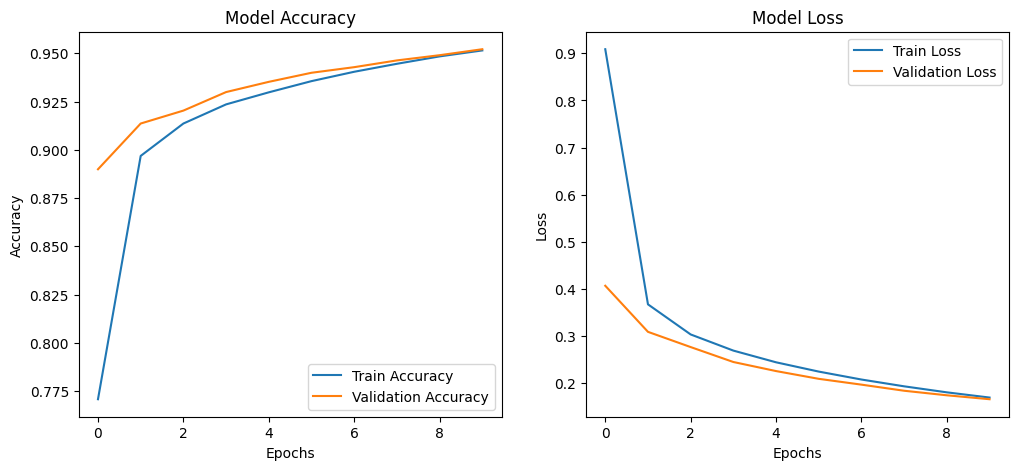

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 6 : Display sample digits from dataset

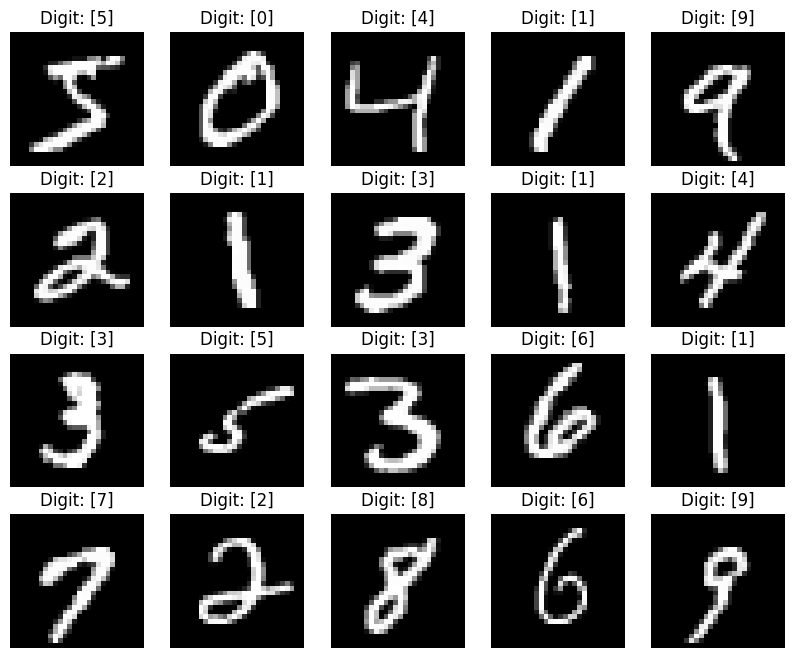

In [9]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Digit: [{digit}]")
    plt.axis('off')

plt.figure(figsize=(10, 8))
for i in range(20):
    plot_digit(x_train[i], y_train[i], plt, i)
plt.show()
